# Logistic Regression: SUV Purchase Data

This dataset reveals information on whether an SUV is purchased or not. The goal is to create a logistic regression model and evaluate if the model corectly predicts the purchase of an SUV by an individual.

In [4]:
#import essential libraries

#Basics
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, recall_score
from sklearn.preprocessing import StandardScaler

In [5]:
#import the dataset
suv_data = pd.read_csv('suv_data.csv')

In [6]:
#display the data
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


EDA

In [7]:
#Check the number of columns and rows
print(suv_data.shape)

(400, 5)


In [8]:
#summarize the data
print(suv_data.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [9]:
print(suv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [10]:
#view datatypes
print(suv_data.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [11]:
#view first 5 rows
print(suv_data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


Visualize the data to access the distribution of the variables.

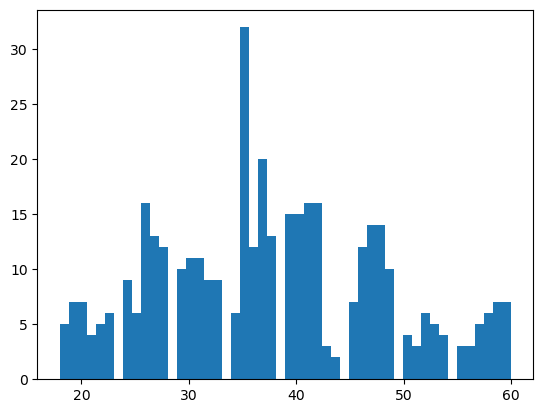

In [12]:
#plot histogram 
plt.hist(suv_data["Age"], bins = 50)
plt.show()

The histogram shows that age is normally distributed

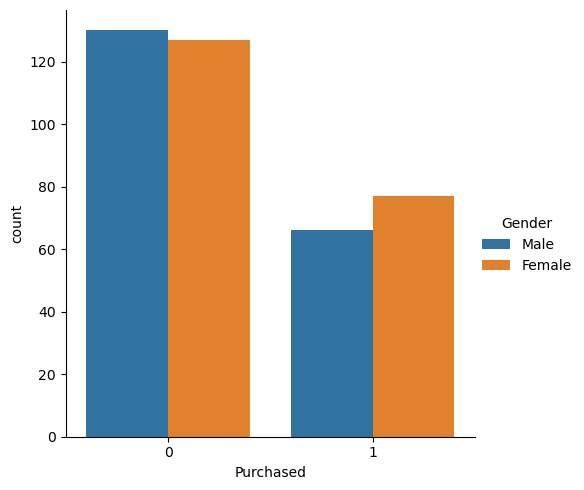

In [13]:
sns.catplot(x= "Purchased", data = suv_data, hue = "Gender", kind = "count")
plt.show()

The data shows that more females bought SUVs than males


# Feature Engineering
logistic regression cannot interpret string data. Therefore, the Gender column will be One-hot coded. One-hot coding converts categorical variables into a binary representation where each category becomes a binary feature column.

In [14]:
Gender_dummy = pd.get_dummies(suv_data["Gender"])

In [15]:
#combine the new dummy dataframe to the original one
suv_data_eng = pd.concat([suv_data, Gender_dummy], axis = 1)
suv_data_eng

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [16]:
#drop categorical columns
suv_df=suv_data_eng.drop("Gender", axis = 1)
suv_df

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


# Defining the Input(independent) variables and the Target(dependent) variable



Fitting the Logistic Regression model using scikit learn library

In [17]:
#Separate the dataset into input and target variables
y_target = suv_df.Purchased
x_inputs = suv_df[["User ID", "Age", "EstimatedSalary", "Female", "Male"]]

Sklearn will be used to split the data into training and testing data. The training division is to assess how well the data performs. The testing division is to evaluate how well the data performs on data it has not seen before. 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_inputs, y_target, train_size=0.8, random_state=50)

print("x_train: ", x_train.shape)
print("x_test: " , x_test.shape)
print("y_train: ", len(y_train))
print("y_test :", len(y_test))

x_train:  (320, 5)
x_test:  (80, 5)
y_train:  320
y_test : 80


# Scaling the data.
Before the data is fitted, it will be scaled with Standardization (Z-score normalization) method in SKlearn. This method transforms the data to have mean of 0 and a standard deviation of 1. It also rescales the data by subtracting the mean and dividing by the standard deviation.

In [19]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print("x_train: ", x_train)
print("x_test : ", x_test)

x_train:  [[ 0.79323515 -1.33626083  0.57552869  0.91025899 -0.91025899]
 [-0.85476504  0.07652595  0.04874572 -1.09858844  1.09858844]
 [ 0.36629689 -0.95951769  0.42920008  0.91025899 -0.91025899]
 ...
 [ 0.1237463  -0.01765983  0.3121372   0.91025899 -0.91025899]
 [ 0.03894208  0.73582645 -0.8292259   0.91025899 -0.91025899]
 [-1.09763361 -0.30021719 -0.65363158  0.91025899 -0.91025899]]
x_test :  [[ 0.73054302 -0.89122082  0.73421338  1.32612997 -1.32612997]
 [ 1.01287977  0.67690966 -0.19007555 -0.7540739   0.7540739 ]
 [-0.69521093 -1.30938895  0.31679258  1.32612997 -1.32612997]
 [ 0.98577615  1.19961981 -0.63731213  1.32612997 -1.32612997]
 [-1.73239084 -0.36851066  0.43605566  1.32612997 -1.32612997]
 [ 1.27425935  0.67690966 -0.51804904 -0.7540739   0.7540739 ]
 [ 0.46614204  2.4541242   2.13555467 -0.7540739   0.7540739 ]
 [-1.76279724 -0.78667879  1.53923923 -0.7540739   0.7540739 ]
 [ 0.20895389  0.88599372  2.01629158  1.32612997 -1.32612997]
 [ 0.4320922   0.57236762 -0.

# Fitting the model

In [20]:
#Declare a logistic regression classifier

classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Measure the accuracy performance of the train data

In [21]:
classifier.score(x_train, y_train)

0.85

EXPLAIN DIFF: The score here evaluates the performance of the model, by default, the classifier uses Accuracy as the score. It is the ratio of number of correct predictions to the total number of predictions. It is essentially the fraction of predictions the model got right. It works well with a balanced class, hence, it is essential to have a quick look at the distribution of the class as done above. 

These four outcomes can also be depicted in the form of a confusion matrix, which is nothing but a visual representation of how many times these outcomes occured for our model's predictions.

#  Evaluating the model and Confusion Matrix

In [22]:
preds = classifier.predict(x_test)
preds

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [23]:
con_mat = confusion_matrix(y_test, preds)
con_mat

array([[49,  5],
       [ 6, 20]], dtype=int64)

In [24]:
tn = con_mat[0][0]
fp = con_mat[0][1]
fn = con_mat[1][0]
tp = con_mat[1][1]

In [28]:
print("True Negatives (Correct Non-Purchase): ", tn)
print("False Positives (Incorrect Purchase): ", fp)
print("False Negatives (Incorrect Non-Purchase): ", fn)
print("True Positives (Correct Purchase)", tp)

True Negatives (Correct Non-Purchase):  49
False Positives (Incorrect Purchase):  5
False Negatives (Incorrect Non-Purchase):  6
True Positives (Correct Purchase) 20


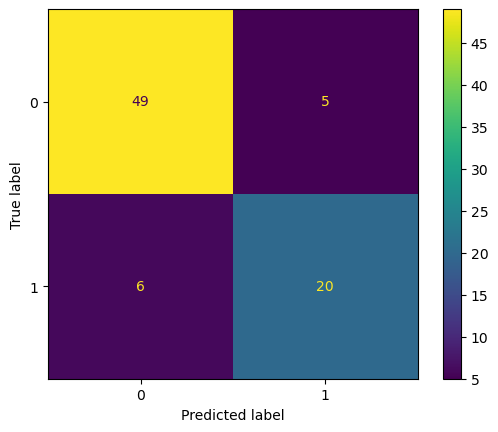

In [26]:
#Plot the confusion matrix

ConfusionMatrixDisplay.from_estimator(classifier,x_test, y_test)
plt.show()

In [27]:
report = classification_report (y_test, preds)
print (report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.80      0.77      0.78        26

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.86      0.86      0.86        80



The report clearly shows the model is correctly predicting the dataset.